# **SW02: Curse of dimensionality**

The curse of dimensionality refers to the fact that the feature space becomes **increasingly sparse** (dünn besetzt) as the number of dimensions increases. 
This sparsity makes it difficult for machine learning algorithms to find patterns in the data. In this notebook, we will explore the 
curse of dimensionality using a simple example.

---



In [1]:
# Basic imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Some Jupyter magic for nicer output
%config InlineBackend.figure_formats = ["svg"]   # Enable vectorized graphics

import sys
sys.path.append("..")
import ml

In [2]:
# Specify some global plotting parameters.
import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = (5, 4)
#mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.titleweight'] = 'bold'
#mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['grid.alpha'] = 0.4
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

# Deafult line width: 2
mpl.rcParams['lines.linewidth'] = 2

# Initialize random number generator
np.random.seed(42)


----



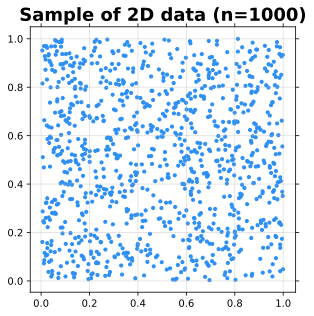

In [3]:
# The following function will be used to create $d$-dimensional data points randomly.
# In each of the dimensions, the data points will be drawn from a uniform distribuiton.

def sample_data(d=10, n=100):
    return np.random.uniform(0, 1, size=(n, d))

n = 1000
d = 2
X = sample_data(d=d, n=n)
fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.axis("square")
plt.title("Sample of 2D data (n=%d)" % n);

Now, let's count the number of data points that are close to the border of the sample space $[0, 1]^d$.

In [4]:

def count_border_points(X, margin=0.01):
    """Count the number of points that are close (within a margin) to 
    the border of the sample space [0, 1]^d."""
    return np.any((X < margin) | (X > 1 - margin), axis=1).sum()

d = 2
n = 1000000
X = sample_data(d=d, n=n)
margin = 0.01
ratio = count_border_points(X=X, margin=margin) / n

print("Fraction of border points for d=2: %.3f" % ratio)


Fraction of border points for d=2: 0.040


Not very surprisingly, and in correspondence with the above plot, the fraction of points close to the border is relatively small. As a matter of fact, for a margin of 0.01, we expect (1 - 0.98·0.98) = 0.04 of the points to be close to the border.

Now, let's see how this fraction changes with the dimensionality of the data...

Fraction of border points for d=   1: 0.015
Fraction of border points for d= 100: 0.874
Fraction of border points for d= 200: 0.979
Fraction of border points for d= 300: 0.999
Fraction of border points for d= 400: 0.998
Fraction of border points for d= 500: 0.999
Fraction of border points for d= 600: 1.000
Fraction of border points for d= 700: 1.000
Fraction of border points for d= 800: 1.000
Fraction of border points for d= 900: 1.000
Fraction of border points for d=1000: 1.000


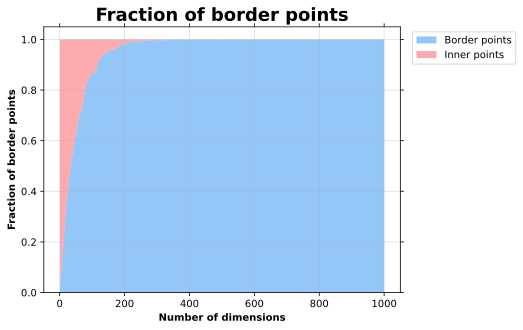

In [5]:
n = 1000            # Number of samples
margin = 0.01       # Margin for border points

ds = np.linspace(1, 1000, 101, dtype=int)
fractions = np.zeros(len(ds))

for i, d in enumerate(ds):
    X = sample_data(d=d, n=n)
    fractions[i] = count_border_points(X=X, margin=margin) / n
    
    if i % 10 == 0:
        print("Fraction of border points for d=%4d: %.3f" % (d, fractions[i]))
    
plt.figure()
plt.title("Fraction of border points")
plt.xlabel("Number of dimensions")
plt.ylabel("Fraction of border points")
plt.stackplot(ds, fractions, 1-fractions, 
              labels=["Border points", "Inner points"], alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1));



Wow, this is counterintuitive! The fraction of border points increases with the number of dimensions! The higher the dimensionality, the more likely it is that a randomly drawn point is close to the border of the sample space. This implies that the local structure of the data is not very informative in high-dimensional data as all points are more or less equally far away from each other.

Let's verify this last statement. In the following, we will create 1000 points `X1` and 1000 points `X2` in $d$ dimensions. Then, we compute the pairwise Euclidean distances between all points. To normalize the distances, we divide by the square root of the dimensionality $d$. (The diagonal of a $d$ dimensional unit cube has length $\sqrt{1^2 + 1^2 + \ldots} = \sqrt{d}$)

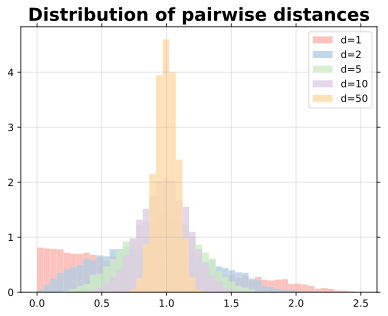

In [6]:
def compute_pairwise_distances(X1, X2):
    return np.sqrt(((X1 - X2)**2).sum(axis=1))

ds = [1, 2, 5, 10, 50]
n = 10000
distances = np.zeros(len(ds))

fig, ax = plt.subplots()
plt.title("Distribution of pairwise distances")

palette = plt.get_cmap("Pastel1")
Ds = []

for i,d in enumerate(ds):
    X1 = sample_data(d=d, n=n)
    X2 = sample_data(d=d, n=n)
    # Compute pairwise distances, normalize by sqrt(d) for better comparison
    # (don't mind the magic constant 6, it's just for scaling)
    D = compute_pairwise_distances(X1, X2) / np.sqrt(d / 6)
    ax.hist(D, bins=np.linspace(0, 2.5, 50), alpha=0.8, label="d=%d" % d, 
            color=palette(i),
            density=True,
            edgecolor="none")

plt.legend()    
plt.show()


The histogram illustrates the distribution of pairwise distances between randomly drawn
data points for different numbers of dimensions. It can be seen that the distributions
become narrower as the number of dimensions increases, while the mean distance converges
to a constant value. This means that in high-dimensional spaces, the distances between
neighboring data points become more uniform, which makes it more difficult to discriminate
between them. This is known as the **curse of dimensionality**.

The curse of diemnsionality has several consequences:
- It becomes increasingly difficult to discriminate between data points as the number of dimensions increases, because the distances between them become more uniform.
- The density of data points decreases exponentially with the number of dimensions. 
- The number of data points required to obtain a representative sample grows exponentially with the number of dimensions.
- The number of parameters required to model the data grows exponentially with the number of dimensions, which makes the models more complex and prone to overfitting.
- The computational complexity of many algorithms grows exponentially with the number of dimensions, which makes them infeasible for high-dimensional data.

Note that the above observations remain valid for distributions other than the uniform distribution.

In [7]:
########################
###    EXERCISE 1    ###
########################

# Imagine you have a dataset with 1000 samples and 20 features. Assuming that 
# the data is uniformly distributed in the unit hypercube [0, 1]^20, what is
# the expected number of samples that are close to the border of the hypercube 
# (within a margin of 0.01)?


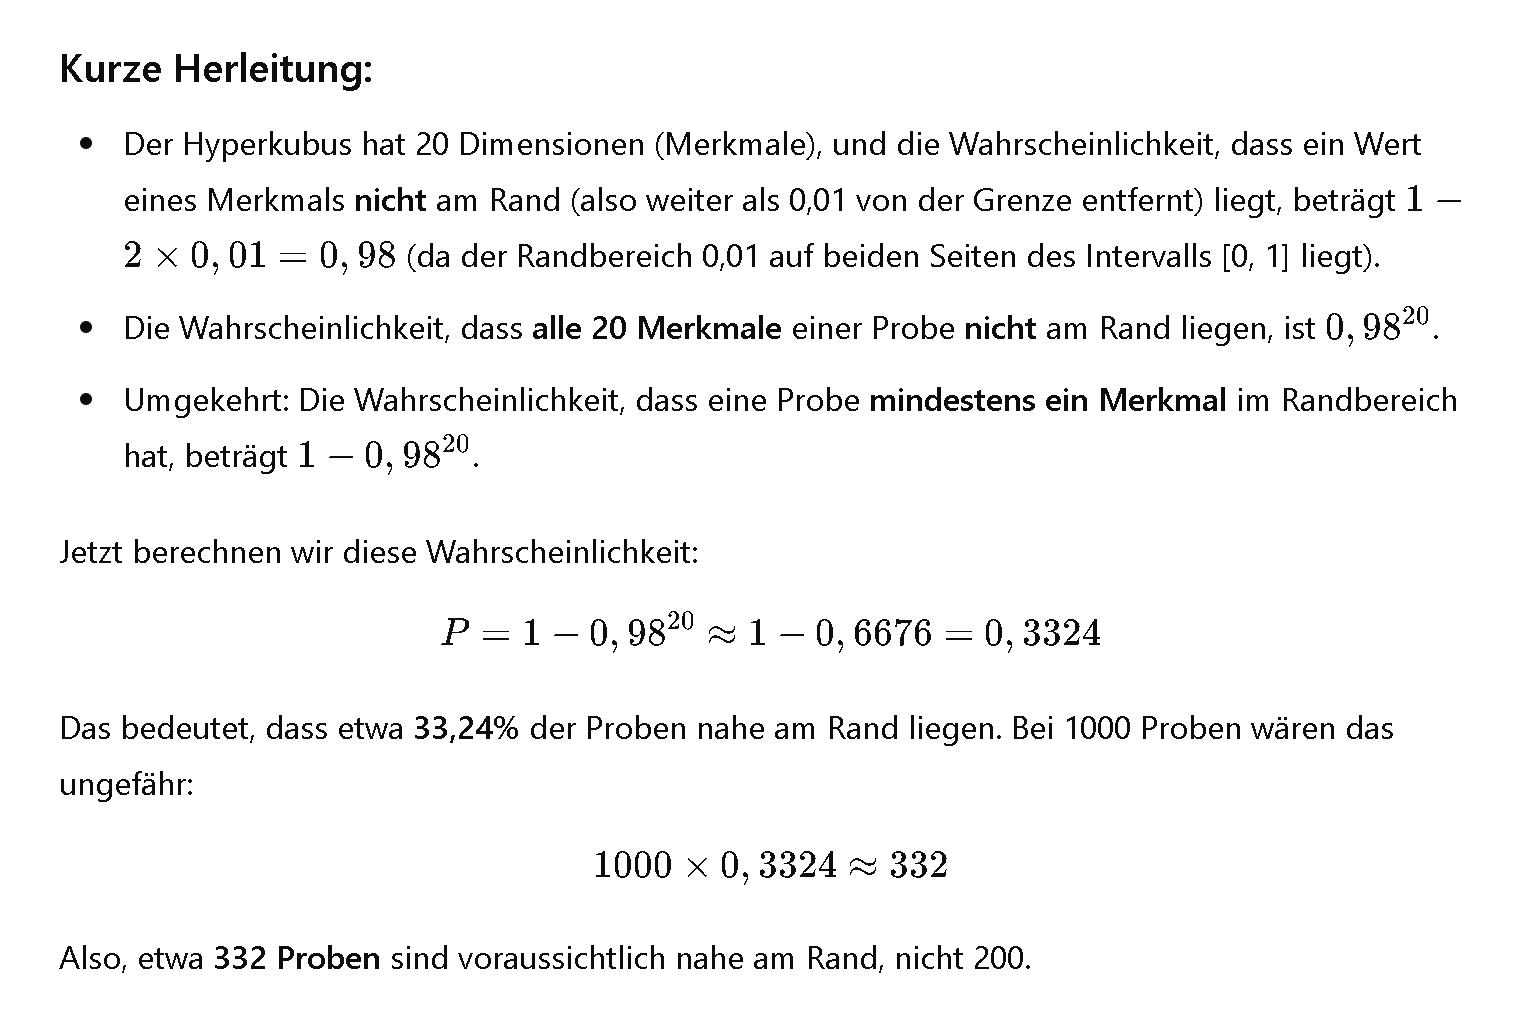

In [9]:
########################
###    EXERCISE 2    ###
########################

# To improve the performance of your machine learning model, you consider to
# add more features to your dataset. The rationale is that more features will
# allow the model to learn more complex patterns. What is the problem with this
# approach?

#It is difficult to find patterns in the data and it conduct noises in the dataset which we don't want to have and also the problem of overfitting. The training time increases also.
# curse of dimensionality

In [11]:
########################
###    EXERCISE 3    ###
########################

# The above analysis made idealized assumptions. Which ones? Are these 
# assumptions realistic in practice? And what if the assumptions are not 
# realistic?

#In Bezug auf welche Frage, Korrektur danach kontrollieren?